In [1]:
# Convolutional Neural Network

# Installing Theano
# pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Installing Tensorflow
# Install Tensorflow from the website: https://www.tensorflow.org/versions/r0.12/get_started/os_setup.html

# Installing Keras
# pip install --upgrade keras

# Part 1 - Building the CNN

# Importing the Keras libraries and packages
import numpy as np
import os
import keras_metrics
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.layers import LSTM
from keras.layers import Reshape

import warnings
warnings.filterwarnings('ignore')

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(64, (3, 3), padding = 'same', input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(64, (3, 3), padding = 'same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third conolutional layer
classifier.add(Convolution2D(64, (3, 3), padding = 'same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())
classifier.add(Dropout(rate = 0.5))

# Step 4 - Full connection
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dropout(rate = 0.5))
classifier.add(Dense(output_dim = 7, activation = 'softmax'))

classifier.summary()

Z:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
__________

In [2]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy', keras_metrics.precision(), keras_metrics.recall()])

In [3]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   height_shift_range =  0.1,
                                   width_shift_range = 0.1,
                                   channel_shift_range = 10)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('train/',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('test/',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 399 images belonging to 7 classes.
Found 136 images belonging to 7 classes.


In [4]:
results = classifier.fit_generator(training_set,
                         samples_per_epoch = 399,
                         nb_epoch = 100,
                         validation_data = test_set,
                         nb_val_samples = 136)

Epoch 1/100
12/12 [==============================] - 124s 10s/step - loss: 1.9434 - acc: 0.1994 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.9024 - val_acc: 0.2362 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
12/12 [==============================] - 118s 10s/step - loss: 1.8891 - acc: 0.2486 - precision: 0.1673 - recall: 0.0105 - val_loss: 1.8568 - val_acc: 0.2352 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
12/12 [==============================] - 120s 10s/step - loss: 1.8104 - acc: 0.2935 - precision: 0.2306 - recall: 0.0184 - val_loss: 1.6959 - val_acc: 0.3161 - val_precision: 0.6366 - val_recall: 0.0807
Epoch 4/100
12/12 [==============================] - 118s 10s/step - loss: 1.6541 - acc: 0.3796 - precision: 0.6450 - recall: 0.0759 - val_loss: 1.5186 - val_acc: 0.3823 - val_precision: 0.6621 - val_recall: 0.1180
Epoch 5/100
12/12 [==============================] - 117s 10s/step - loss: 1.6065 - acc: 0.3724 - precision: 0.6375 

Epoch 39/100
12/12 [==============================] - 115s 10s/step - loss: 1.0370 - acc: 0.6145 - precision: 0.6833 - recall: 0.4968 - val_loss: 0.8335 - val_acc: 0.7065 - val_precision: 0.8525 - val_recall: 0.5162
Epoch 40/100
12/12 [==============================] - 120s 10s/step - loss: 0.9923 - acc: 0.6230 - precision: 0.8019 - recall: 0.3794 - val_loss: 0.7767 - val_acc: 0.7427 - val_precision: 0.8309 - val_recall: 0.6099
Epoch 41/100
12/12 [==============================] - 116s 10s/step - loss: 0.9211 - acc: 0.6250 - precision: 0.7030 - recall: 0.4792 - val_loss: 0.8000 - val_acc: 0.7133 - val_precision: 0.7978 - val_recall: 0.5802
Epoch 42/100
12/12 [==============================] - 116s 10s/step - loss: 0.9524 - acc: 0.6423 - precision: 0.7529 - recall: 0.5105 - val_loss: 0.7884 - val_acc: 0.6463 - val_precision: 0.7674 - val_recall: 0.5362
Epoch 43/100
12/12 [==============================] - 119s 10s/step - loss: 0.8740 - acc: 0.6615 - precision: 0.7834 - recall: 0.5234 - 

Epoch 77/100
12/12 [==============================] - 115s 10s/step - loss: 0.7238 - acc: 0.7155 - precision: 0.7863 - recall: 0.6235 - val_loss: 0.7092 - val_acc: 0.7060 - val_precision: 0.7622 - val_recall: 0.6323
Epoch 78/100
12/12 [==============================] - 116s 10s/step - loss: 0.7432 - acc: 0.7188 - precision: 0.8033 - recall: 0.6484 - val_loss: 0.7962 - val_acc: 0.6617 - val_precision: 0.7308 - val_recall: 0.6180
Epoch 79/100
12/12 [==============================] - 119s 10s/step - loss: 0.7481 - acc: 0.7515 - precision: 0.8072 - recall: 0.6312 - val_loss: 0.7554 - val_acc: 0.6830 - val_precision: 0.7713 - val_recall: 0.6466
Epoch 80/100
12/12 [==============================] - 113s 9s/step - loss: 0.7523 - acc: 0.7307 - precision: 0.8177 - recall: 0.6074 - val_loss: 0.6978 - val_acc: 0.7068 - val_precision: 0.7420 - val_recall: 0.6112
Epoch 81/100
12/12 [==============================] - 115s 10s/step - loss: 0.6502 - acc: 0.7539 - precision: 0.8464 - recall: 0.6728 - v

In [5]:
test_steps_per_epoch = np.math.ceil(test_set.samples / test_set.batch_size)
predictions = classifier.predict_generator(test_set, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)

In [6]:
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())   

In [7]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

             precision    recall  f1-score   support

      anger       0.24      0.25      0.25        32
    boredom       0.10      0.05      0.06        21
    disgust       0.11      0.17      0.13        12
       fear       0.20      0.12      0.15        17
  happiness       0.16      0.17      0.16        18
    neutral       0.13      0.20      0.16        20
    sadness       0.21      0.19      0.20        16

avg / total       0.17      0.17      0.17       136



Confusion matrix, without normalization
[[8 3 4 3 2 7 5]
 [6 1 3 0 5 3 3]
 [3 0 2 1 2 2 2]
 [4 1 4 2 2 3 1]
 [4 2 2 1 3 6 0]
 [4 1 4 3 4 4 0]
 [4 2 0 0 1 6 3]]


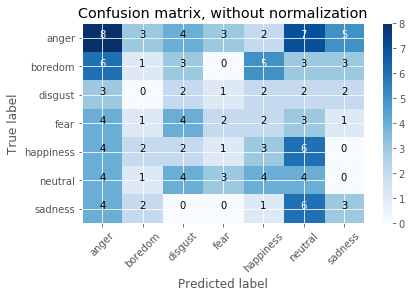

Normalized confusion matrix
[[25.      9.375  12.5     9.375   6.25   21.875  15.625 ]
 [28.5714  4.7619 14.2857  0.     23.8095 14.2857 14.2857]
 [25.      0.     16.6667  8.3333 16.6667 16.6667 16.6667]
 [23.5294  5.8824 23.5294 11.7647 11.7647 17.6471  5.8824]
 [22.2222 11.1111 11.1111  5.5556 16.6667 33.3333  0.    ]
 [20.      5.     20.     15.     20.     20.      0.    ]
 [25.     12.5     0.      0.      6.25   37.5    18.75  ]]


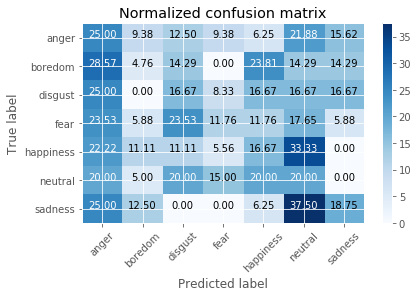

In [10]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*100
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect = 'auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(true_classes, predicted_classes)
np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels,
                      title='Confusion matrix, without normalization')
plt.savefig("non_normalized_confusion_matrix_cnn.png")
plt.show()
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig("normalized_confusion_matrix_cnn.png")
plt.show()

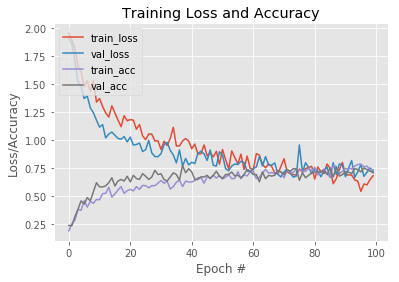

In [11]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
N = 100
plt.plot(np.arange(0, N), results.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), results.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), results.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), results.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.savefig("plot_cnn.png")